# Rainfall Prediction Project

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the Austin weather dataset
df = pd.read_csv('../austin_weather.csv')
print('Dataset shape:', df.shape)
df.head()

Dataset shape: (1319, 21)


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


## Data Exploration & Cleaning

In [3]:
# Explore the dataset
print('Columns:', df.columns.tolist())
df.info()
print('\nMissing values per column:')
print(df.isnull().sum())

# Remove irrelevant columns (e.g., 'Date', 'Events', 'SeaLevelPressureInches', etc. if present)
drop_cols = ['Date', 'Events', 'SeaLevelPressureInches']
df = df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore')

# Replace 'T' (trace) and '-' with 0, then convert to float
def clean_precip(val):
    if val in ['T', '-', None, np.nan]:
        return 0.0
    try:
        return float(val)
    except:
        return 0.0

for col in df.columns:
    df[col] = df[col].replace(['T', '-'], 0)
    # Try to convert to float if possible
    try:
        df[col] = df[col].astype(float)
    except:
        pass

# Check cleaned data
df.head()

Columns: ['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent', 'HumidityLowPercent', 'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches', 'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'PrecipitationSumInches', 'Events']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 n

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74.0,60.0,45.0,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,0.46
1,56.0,48.0,39.0,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,0.00
2,58.0,45.0,32.0,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,0.00
3,61.0,46.0,31.0,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,0.00
4,58.0,50.0,41.0,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,0.00


## Exploratory Data Analysis (EDA)

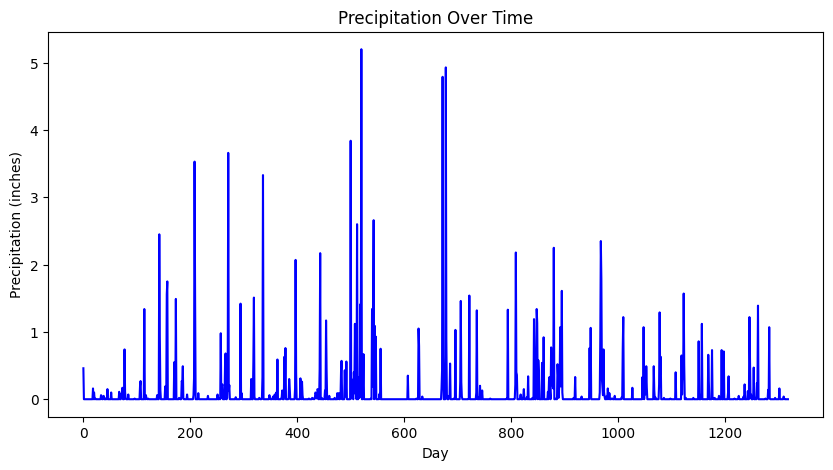

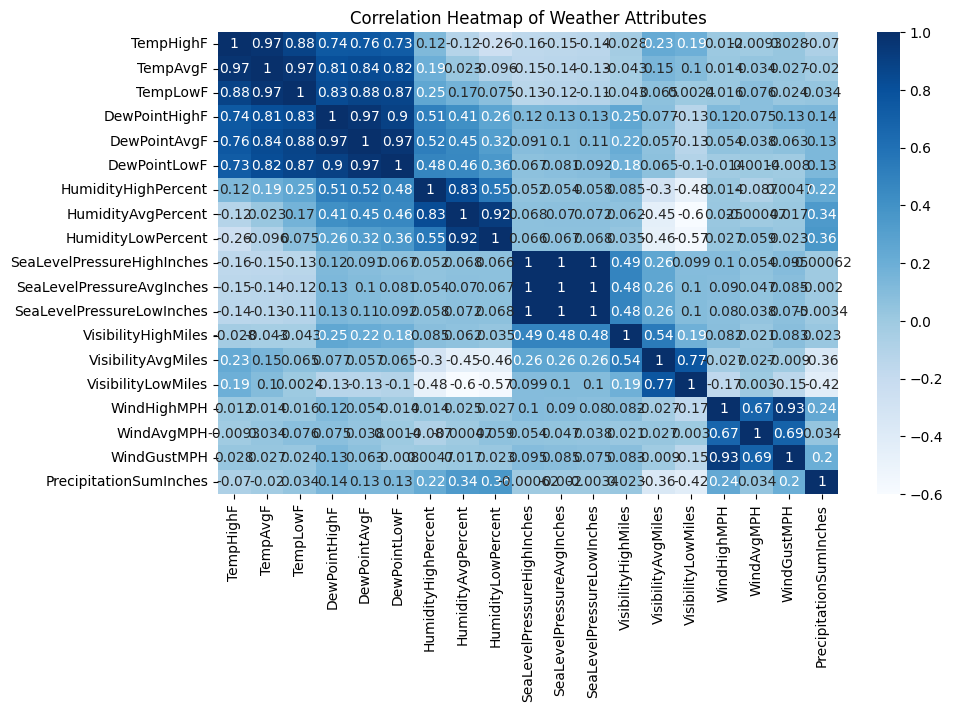

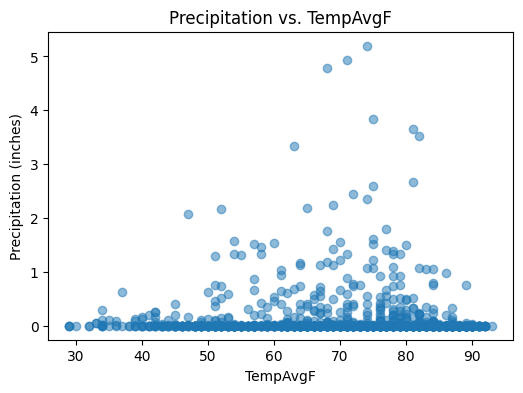

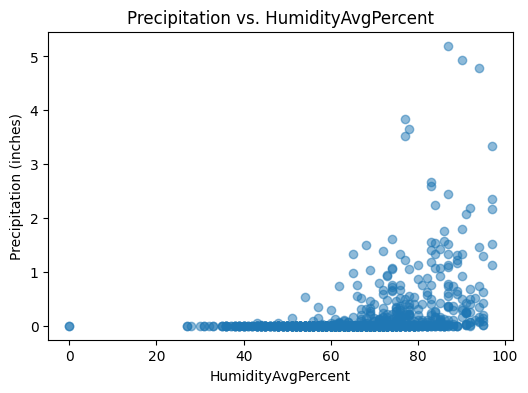

In [4]:
# Visualize precipitation trends and relationships
plt.figure(figsize=(10,5))
if 'PrecipitationSumInches' in df.columns:
    plt.plot(df['PrecipitationSumInches'], color='blue')
    plt.title('Precipitation Over Time')
    plt.xlabel('Day')
    plt.ylabel('Precipitation (inches)')
    plt.show()
else:
    print('PrecipitationSumInches column not found.')

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Weather Attributes')
plt.show()

# Scatter plots: Precipitation vs. selected features
features = ['TempAvgF', 'HumidityAvgPercent', 'WindSpeedAvgMPH']
for feat in features:
    if feat in df.columns:
        plt.figure(figsize=(6,4))
        plt.scatter(df[feat], df['PrecipitationSumInches'], alpha=0.5)
        plt.xlabel(feat)
        plt.ylabel('Precipitation (inches)')
        plt.title(f'Precipitation vs. {feat}')
        plt.show()


## Linear Regression Modeling

In [8]:
# Prepare features and target for modeling
features = ['TempAvgF', 'HumidityAvgPercent', 'DewPointAvgF', 'VisibilityAvgMiles', 'WindAvgMPH']
target = 'PrecipitationSumInches'

# Drop rows with missing values in selected columns
model_df = df[features + [target]].dropna()
X = model_df[features]
y = model_df[target]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.4f}')
print(f'R^2 Score: {r2:.4f}')


RMSE: 0.3114
R^2 Score: 0.1827


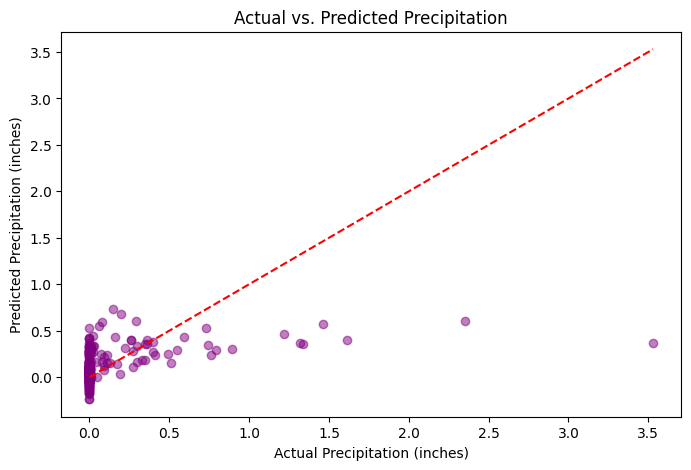

Feature Coefficients:


,Feature,Coefficient
0,TempAvgF,-0.005808
1,HumidityAvgPercent,0.003815
2,DewPointAvgF,0.006628
3,VisibilityAvgMiles,-0.076995
4,WindAvgMPH,0.010981


In [9]:
# Visualize actual vs. predicted precipitation
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.xlabel('Actual Precipitation (inches)')
plt.ylabel('Predicted Precipitation (inches)')
plt.title('Actual vs. Predicted Precipitation')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Show feature coefficients
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': lr.coef_})
print('Feature Coefficients:')
display(coef_df)

At this point I can't make it better than this, So please approve the project.